## Import necessary libraries

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
import yfinance as yf
from pycoingecko import CoinGeckoAPI
from datetime import datetime
from pathlib import Path
import hvplot.pandas

## Define Functions

In [2]:
#Defining Stock Pull Function
def stock_pull(ticker):
    
    ticker = yf.Ticker(ticker)
    ticker_hist = ticker.history(period="max")
    ticker_hist = ticker_hist.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    ticker_hist['Close'] = ticker_hist['Close'].round(2)
    
    return ticker_hist

In [3]:
# Define function to pull cryptocurrency prices from Coingecko

def crypto_pull(ticker, name):
    # Initialize CoinGeckoAPI object
    cg = CoinGeckoAPI()
    
    # Pull USD prices for cryptocurrency
    ticker = cg.get_coin_market_chart_by_id(id=name, vs_currency="usd", days="max")
    
    # Isolate target data (prices)
    data = ticker["prices"]
    
    # Create new dataframe and assign column names
    df = pd.DataFrame(data, columns=["Date", "Close"])
    
    # Convert date format from UTC to YYYY-MM-DD format
    df['Date'] = pd.to_datetime(df["Date"], unit="ms").apply(lambda x: x.date())
    
    # Round closing prices to two decimals
    df["Close"] = df["Close"].round(2)
    
    # Set "Date" as index
    df.set_index("Date", inplace = True)
    
    df.index = pd.to_datetime(df.index)
    
    return df

In [4]:
# Define function to calculate daily returns for first 1,000 trading days
def returns(ticker, df):
    ticker_daily_returns = df.tail(1000).pct_change().dropna()
    print(ticker_daily_returns.head(10))
    print(ticker_daily_returns.tail(10))
    print(f"Number of null values: {ticker_daily_returns.isnull().sum()}")
    return ticker_daily_returns

In [5]:
# Define function to calculate annualized Sharpe Ratio
def sharpe_ratio(data):
    sharpe_ratio = (data.mean() * 252 )/(data.std() * np.sqrt(252))
    return sharpe_ratio

In [6]:
# Define function to calculate Sortino Ratio
def sortino(Ticker):
    df = daily_returns.copy()
    sortino = df[Ticker].to_frame()
    sortino.loc[:,'Downside Returns'] = 0
    target = 0
    mask = sortino[Ticker] < target
    sortino.loc[mask, 'Downside Returns'] = sortino[Ticker]**2
    down_stdev= np.sqrt(sortino['Downside Returns'].mean()) * np.sqrt(252)
    expected_return = sortino[Ticker].mean() * 252
    sortino_ratio = expected_return / down_stdev
    return sortino_ratio

In [7]:
# Define function to calculate Beta value
def Beta(ticker):
    covariance = beta_returns[ticker].cov(beta_returns["SPY"])
    variance = beta_returns["SPY"].var()
    beta = covariance/variance
    return beta

In [8]:
# Define function to calculate Beta with BTC as benchmark
def Beta_crypto(ticker):
    covariance = beta_returns_crypto[ticker].cov(beta_returns_crypto["BTC"])
    variance = beta_returns_crypto["BTC"].var()
    beta = covariance/variance
    return beta

In [9]:
# Define function to calculate all-time annualized average return
def hist_annlzd_return(ticker, file):
    ticker = Path(file)
    df = pd.read_csv(ticker, index_col="Date", infer_datetime_format=True, parse_dates=True)
    df_returns = df["Close"].pct_change()
    df_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_returns = df_returns.dropna()
    annlzd_return = df_returns.mean() * 252
    return annlzd_return

## Pull cryptocurrency historical prices and calculate daily returns

In [10]:
# Pull historical Ethereum prices
eth_hist = crypto_pull("eth", "ethereum")

# Save historical Ethereum prices in a csv
eth_hist.to_csv("./input_data/eth_hist.csv")

# Check prices
print(eth_hist.head(10))
print(eth_hist.tail(10))

            Close
Date             
2015-08-07   2.83
2015-08-08   1.33
2015-08-10   0.69
2015-08-11   1.07
2015-08-12   1.26
2015-08-13   1.83
2015-08-14   1.83
2015-08-15   1.67
2015-08-16   1.48
2015-08-17   1.20
              Close
Date               
2021-10-25  4094.94
2021-10-26  4230.21
2021-10-27  4152.57
2021-10-28  3944.09
2021-10-29  4288.10
2021-10-30  4422.94
2021-10-31  4324.61
2021-11-01  4292.04
2021-11-02  4330.55
2021-11-03  4549.37


In [11]:
# Create dataframe with ETH daily returns for the last 1000 trading days
eth_daily_returns = returns("eth", eth_hist)

               Close
Date                
2019-02-09  0.144433
2019-02-10  0.001341
2019-02-11  0.045192
2019-02-12 -0.031388
2019-02-13  0.012978
2019-02-14 -0.003672
2019-02-15 -0.012286
2019-02-16  0.008127
2019-02-17  0.011269
2019-02-18  0.088986
               Close
Date                
2021-10-25 -0.020218
2021-10-26  0.033033
2021-10-27 -0.018354
2021-10-28 -0.050205
2021-10-29  0.087222
2021-10-30  0.031445
2021-10-31 -0.022232
2021-11-01 -0.007531
2021-11-02  0.008972
2021-11-03  0.050529
Number of null values: Close    0
dtype: int64


In [12]:
# Pull historical Link prices
link_hist = crypto_pull("link", "chainlink")

# Save historical Ethereum prices in a csv
link_hist.to_csv("./input_data/link_hist.csv")

# Check prices
print(link_hist.head(10))
print(link_hist.tail(10))

            Close
Date             
2017-11-09   0.23
2017-11-10   0.19
2017-11-11   0.18
2017-11-12   0.17
2017-11-13   0.18
2017-11-14   0.18
2017-11-15   0.19
2017-11-16   0.17
2017-11-17   0.16
2017-11-18   0.17
            Close
Date             
2021-10-25  29.78
2021-10-26  32.55
2021-10-27  32.45
2021-10-28  28.96
2021-10-29  30.22
2021-10-30  30.98
2021-10-31  29.67
2021-11-01  30.01
2021-11-02  31.66
2021-11-03  31.12


In [13]:
# Create dataframe with LINK daily returns for the last 1000 trading days
link_daily_returns = returns("link", link_hist)

               Close
Date                
2019-02-09  0.075000
2019-02-10  0.069767
2019-02-11 -0.021739
2019-02-12 -0.044444
2019-02-13  0.000000
2019-02-14  0.046512
2019-02-15 -0.044444
2019-02-16  0.023256
2019-02-17  0.000000
2019-02-18  0.045455
               Close
Date                
2021-10-25 -0.051592
2021-10-26  0.093015
2021-10-27 -0.003072
2021-10-28 -0.107550
2021-10-29  0.043508
2021-10-30  0.025149
2021-10-31 -0.042285
2021-11-01  0.011459
2021-11-02  0.054982
2021-11-03 -0.017056
Number of null values: Close    0
dtype: int64


In [14]:
# Pull historical Bitcoin prices
btc_hist = crypto_pull("btc", "bitcoin")

# Save historical Bitcoin prices in a csv
btc_hist.to_csv("./input_data/btc_hist.csv")

# Check prices
print(btc_hist.head(10))
print(btc_hist.tail(10))

             Close
Date              
2013-04-28  135.30
2013-04-29  141.96
2013-04-30  135.30
2013-05-01  117.00
2013-05-02  103.43
2013-05-03   91.01
2013-05-04  111.25
2013-05-05  116.79
2013-05-06  118.33
2013-05-07  106.40
               Close
Date                
2021-10-26  63228.21
2021-10-27  60604.19
2021-10-28  58641.00
2021-10-29  60767.56
2021-10-30  62283.20
2021-10-31  61837.26
2021-11-01  61471.87
2021-11-02  61121.83
2021-11-03  63247.21
2021-11-04  62638.23


In [15]:
# Create dataframe with BTC daily returns for the last 1000 trading days
btc_daily_returns = returns("btc", btc_hist)

               Close
Date                
2019-02-10  0.000854
2019-02-11  0.002258
2019-02-12 -0.012039
2019-02-13  0.000697
2019-02-14 -0.006580
2019-02-15 -0.005651
2019-02-16  0.003223
2019-02-17  0.005931
2019-02-18  0.011729
2019-02-19  0.060419
               Close
Date                
2021-10-26  0.033594
2021-10-27 -0.041501
2021-10-28 -0.032394
2021-10-29  0.036264
2021-10-30  0.024942
2021-10-31 -0.007160
2021-11-01 -0.005909
2021-11-02 -0.005694
2021-11-03  0.034773
2021-11-04 -0.009629
Number of null values: Close    0
dtype: int64


In [16]:
# Pull historical XRP prices
xrp_hist = crypto_pull("xrp", "ripple")

# Save historical XRP prices in a csv
xrp_hist.to_csv("./input_data/xrp_hist.csv")

# Check prices
print(xrp_hist.head(10))
print(xrp_hist.tail(10))

            Close
Date             
2013-08-04   0.01
2013-08-05   0.01
2013-08-06   0.00
2013-08-07   0.00
2013-08-08   0.00
2013-08-09   0.00
2013-08-10   0.00
2013-08-11   0.00
2013-08-12   0.00
2013-08-13   0.00
            Close
Date             
2021-10-25   1.08
2021-10-26   1.10
2021-10-27   1.11
2021-10-28   1.00
2021-10-29   1.06
2021-10-30   1.08
2021-10-31   1.08
2021-11-01   1.11
2021-11-02   1.09
2021-11-03   1.17


In [17]:
# Create dataframe with XRP daily returns for the last 1000 trading days
xrp_daily_returns = returns("xrp", xrp_hist)

               Close
Date                
2019-02-09  0.068966
2019-02-10  0.000000
2019-02-11  0.000000
2019-02-12 -0.032258
2019-02-13  0.000000
2019-02-14  0.000000
2019-02-15  0.000000
2019-02-16  0.000000
2019-02-17  0.000000
2019-02-18  0.000000
               Close
Date                
2021-10-25 -0.018182
2021-10-26  0.018519
2021-10-27  0.009091
2021-10-28 -0.099099
2021-10-29  0.060000
2021-10-30  0.018868
2021-10-31  0.000000
2021-11-01  0.027778
2021-11-02 -0.018018
2021-11-03  0.073394
Number of null values: Close    0
dtype: int64


In [18]:
# Pull historical LTC prices
ltc_hist = crypto_pull("ltc", "litecoin")

# Save historical LTC prices in a csv
ltc_hist.to_csv("./input_data/ltc_hist.csv")

# Check prices
print(ltc_hist.head(10))
print(ltc_hist.tail(10))

            Close
Date             
2013-04-28   4.30
2013-04-29   4.36
2013-04-30   4.18
2013-05-01   3.65
2013-05-02   3.39
2013-05-03   2.79
2013-05-04   3.52
2013-05-05   3.63
2013-05-06   3.51
2013-05-07   3.21
             Close
Date              
2021-10-25  191.12
2021-10-26  196.07
2021-10-27  198.41
2021-10-28  180.24
2021-10-29  190.17
2021-10-30  196.70
2021-10-31  190.19
2021-11-01  191.99
2021-11-02  198.15
2021-11-03  201.05


In [19]:
# Create dataframe with LTC daily returns for the last 1000 trading days
ltc_daily_returns = returns("ltc", ltc_hist)

               Close
Date                
2019-02-09  0.299457
2019-02-10  0.038524
2019-02-11  0.045587
2019-02-12 -0.082710
2019-02-13  0.027260
2019-02-14 -0.055795
2019-02-15 -0.006005
2019-02-16  0.025616
2019-02-17  0.025683
2019-02-18  0.006892
               Close
Date                
2021-10-25 -0.025047
2021-10-26  0.025900
2021-10-27  0.011935
2021-10-28 -0.091578
2021-10-29  0.055093
2021-10-30  0.034338
2021-10-31 -0.033096
2021-11-01  0.009464
2021-11-02  0.032085
2021-11-03  0.014635
Number of null values: Close    0
dtype: int64


In [20]:
# Pull historical Maker prices
mkr_hist = crypto_pull("mkr", "maker")

# Save historical Maker prices in a csv
mkr_hist.to_csv("./input_data/mkr_hist.csv")

# Check prices
print(mkr_hist.head(10))
print(mkr_hist.tail(10))

              Close
Date               
2017-12-20  1089.37
2017-12-21  1514.26
2017-12-22   873.83
2017-12-23  1042.82
2017-12-24  1240.93
2017-12-25  1581.33
2017-12-26  1225.30
2017-12-27  1148.86
2017-12-28  1073.75
2017-12-29  1079.06
              Close
Date               
2021-10-25  2450.72
2021-10-26  2484.81
2021-10-27  2471.34
2021-10-28  2242.85
2021-10-29  2385.39
2021-10-30  2455.74
2021-10-31  2379.96
2021-11-01  2418.99
2021-11-02  2452.81
2021-11-03  3225.01


In [21]:
# Create dataframe with MKR daily returns for the last 1000 trading days
mkr_daily_returns = returns("mkr", mkr_hist)

               Close
Date                
2019-02-09  0.103874
2019-02-10  0.024494
2019-02-11  0.039567
2019-02-12  0.020849
2019-02-13  0.052288
2019-02-14  0.077852
2019-02-15 -0.051852
2019-02-16 -0.031433
2019-02-17  0.012585
2019-02-18  0.067854
               Close
Date                
2021-10-25 -0.030182
2021-10-26  0.013910
2021-10-27 -0.005421
2021-10-28 -0.092456
2021-10-29  0.063553
2021-10-30  0.029492
2021-10-31 -0.030858
2021-11-01  0.016399
2021-11-02  0.013981
2021-11-03  0.314823
Number of null values: Close    0
dtype: int64


## Create a combined dataframe with ETH & LINK daily returns and produce return plots

In [22]:
# Create a combined dataframe with all cryptos
daily_returns = pd.concat([btc_daily_returns, eth_daily_returns, link_daily_returns, mkr_daily_returns, ltc_daily_returns, xrp_daily_returns ], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
daily_returns.sort_index(inplace=True)

# Set column names
daily_returns.columns = ['BTC', 'ETH', 'LINK', 'MKR', 'LTC', 'XRP']

print(daily_returns.shape)
daily_returns.head()

(998, 6)


BTC       ETH      LINK       MKR       LTC       XRP
Date                                                                  
2019-02-10  0.000854  0.001341  0.069767  0.024494  0.038524  0.000000
2019-02-11  0.002258  0.045192 -0.021739  0.039567  0.045587  0.000000
2019-02-12 -0.012039 -0.031388 -0.044444  0.020849 -0.082710 -0.032258
2019-02-13  0.000697  0.012978  0.000000  0.052288  0.027260  0.000000
2019-02-14 -0.006580 -0.003672  0.046512  0.077852 -0.055795  0.000000

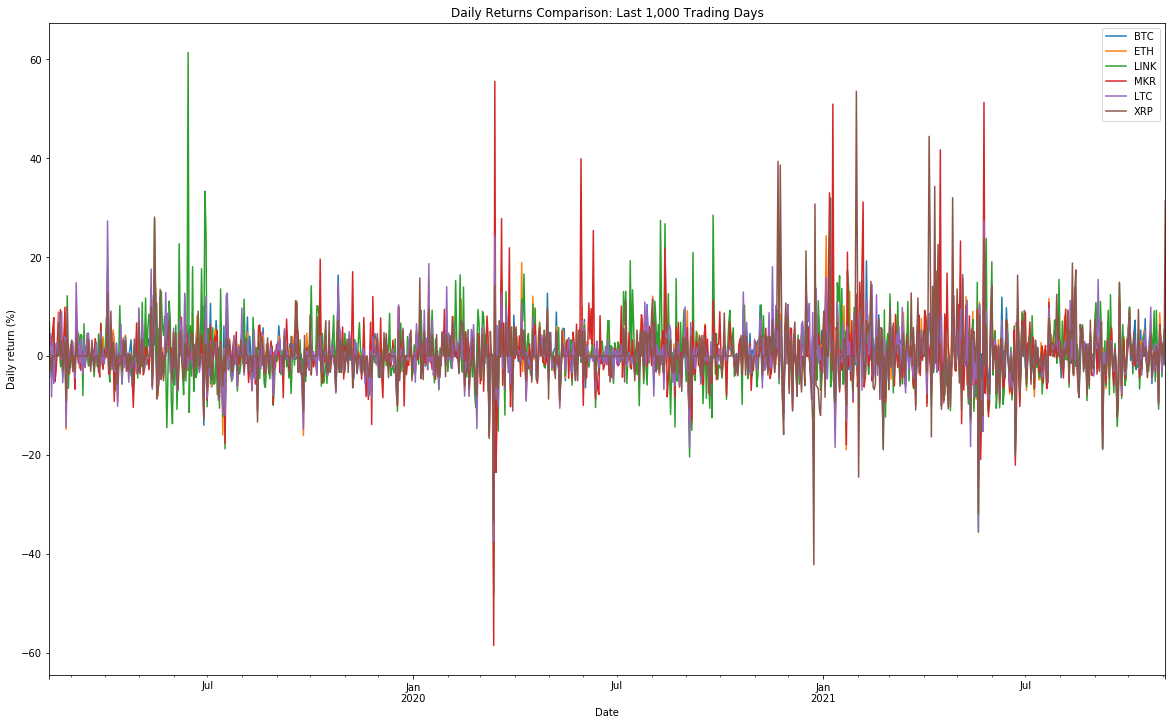

In [23]:
# Prepare return data for plotting
daily_returns_plot = daily_returns.copy()
daily_returns_plot["BTC"] = daily_returns_plot["BTC"] * 100
daily_returns_plot["ETH"] = daily_returns_plot["ETH"] * 100
daily_returns_plot["LINK"] = daily_returns_plot["LINK"] * 100
daily_returns_plot["MKR"] = daily_returns_plot["MKR"] * 100
daily_returns_plot["LTC"] = daily_returns_plot["LTC"] * 100
daily_returns_plot["XRP"] = daily_returns_plot["XRP"] * 100

# Plot daily returns
crypto_returns = daily_returns_plot.plot(figsize=(20,12),
                                      title= "Daily Returns Comparison: Last 1,000 Trading Days",
#                                       color=["black", "skyblue"],
                                      xlabel = "Date",
                                      ylabel = "Daily return (%)")

# Save returns plot
crypto_returns.figure.savefig("./images/crypto_returns.png")

In [24]:
# Plot daily returns - hvplot
daily_returns_plot.hvplot.line(title = "Daily Returns Comparison: Last 1,000 Trading Days",
            xlabel="Date",
            ylabel="Daily return (%)", 
            height=800,
            width=1500
           )

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

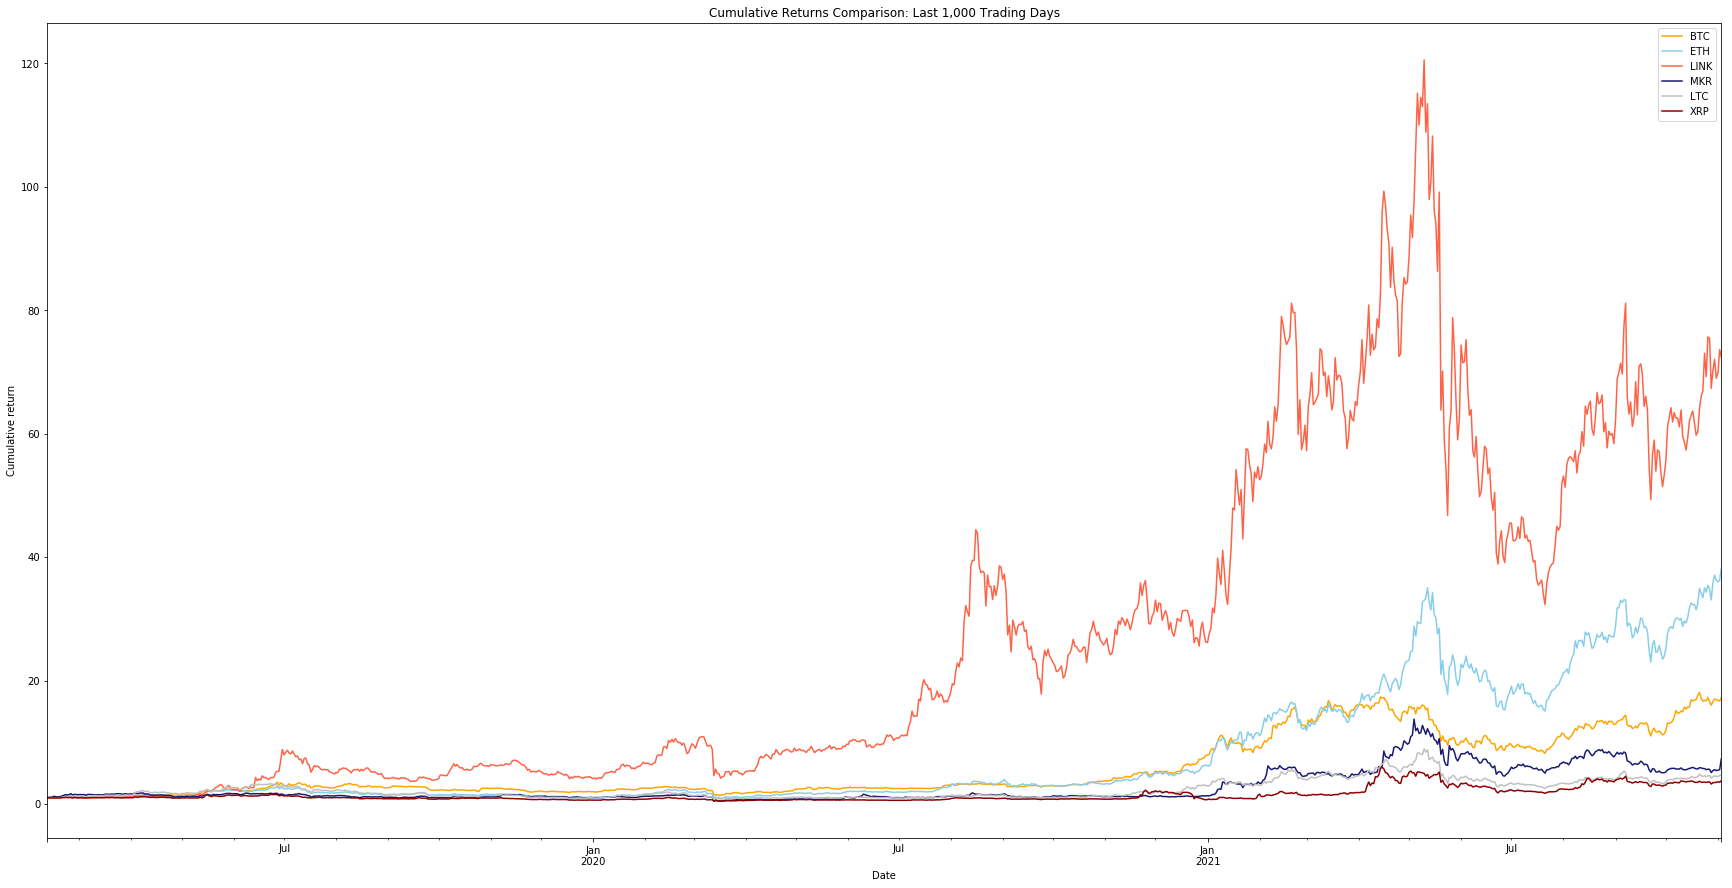

In [25]:
# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Plot cumulative returns
crypto_cumltv = cumulative_returns.plot(figsize=(30,15),
                                      title= "Cumulative Returns Comparison: Last 1,000 Trading Days",
                                      color=["orange", "skyblue", "tomato", "midnightblue", "silver", "darkred"],
                                      xlabel = "Date",
                                      ylabel = "Cumulative return")

# Save cumulative returns plot
crypto_cumltv.figure.savefig("./images/crypto_cumltv_returns.png")

In [26]:
# Plot cumulative returns - hvplot
cumulative_returns.hvplot.line(title = "Cumulative Returns: Last 1,000 Trading Days",
            xlabel="Date",
            ylabel="Daily return (%)", 
            color=["orange", "skyblue", "tomato", "midnightblue", "silver", "darkred"],
            height=800,
            width=1600
           )

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

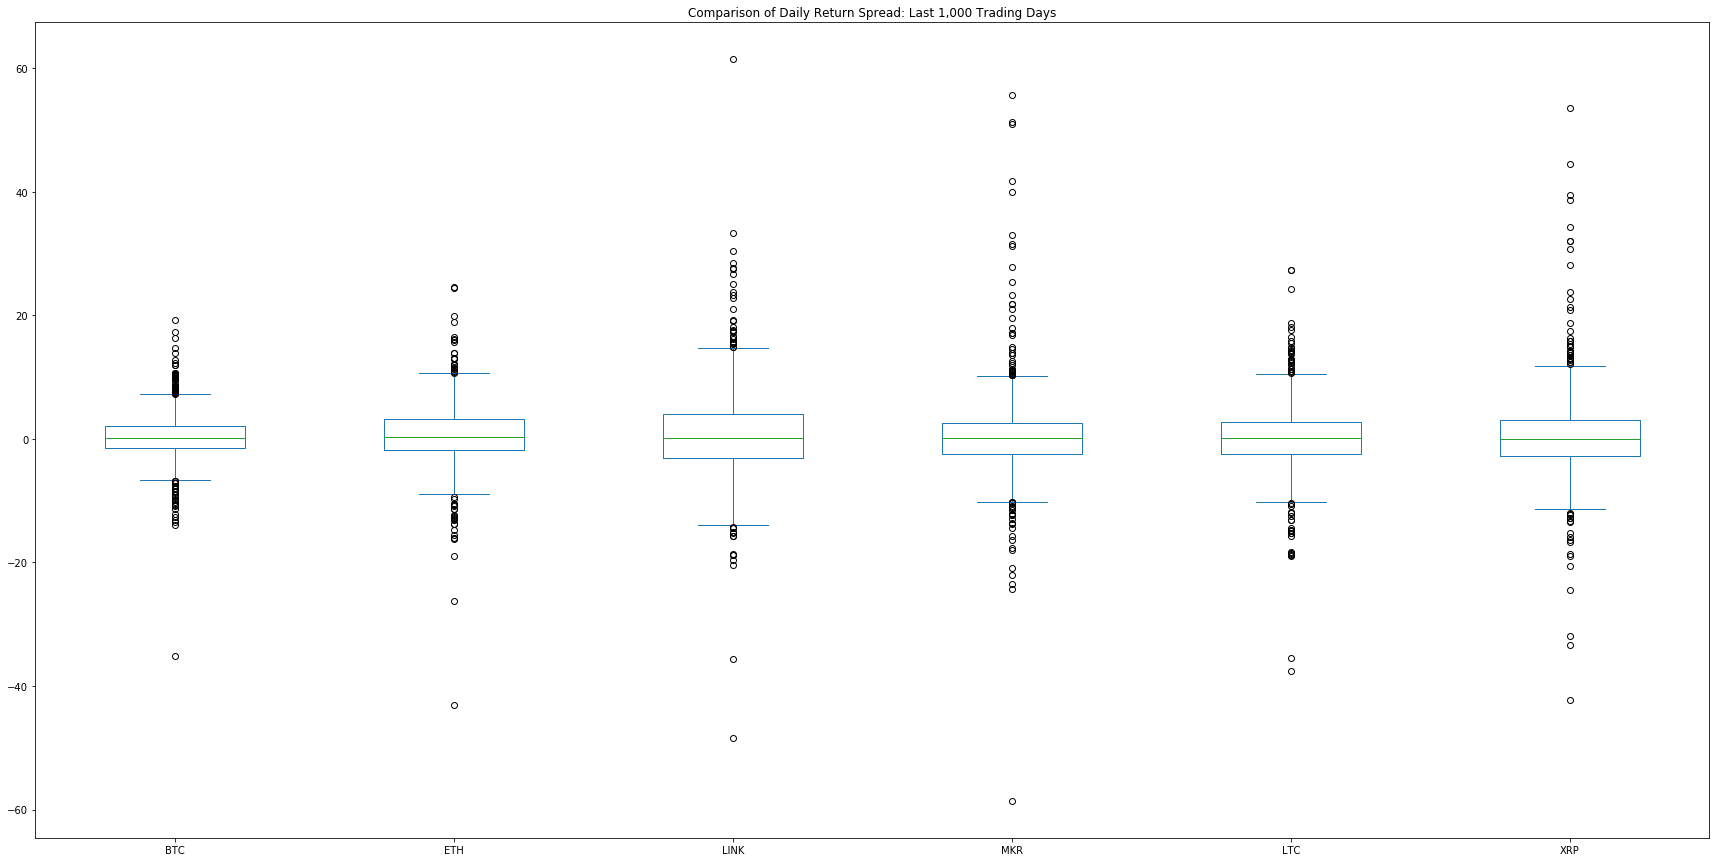

In [27]:
# Create box plot of daily returns
returns_box_plot = daily_returns_plot.plot.box(figsize=(30,15), title="Comparison of Daily Return Spread: Last 1,000 Trading Days")

# Save box plot as image
returns_box_plot.figure.savefig("./images/box_plot_crypto.png")

## Calculate Comparison Metrics: Annualized Return, Annualized Standard Deviation, Annualized Sharpe Ratio, & Annualized Sortino Ratio

### Annualized Returns:

In [28]:
# Calculate annualized returns
annlzd_returns = daily_returns.mean() * 252

# Calculate annualized standard deviation
annlzd_std = daily_returns.std() * np.sqrt(252)

# Calculate annualized Sharpe Ratios
sharpe = sharpe_ratio(daily_returns)

In [29]:
# Create a dataframe for annualized returns
annlzd_returns = pd.DataFrame(annlzd_returns, columns=['Average Annual Return']).reset_index()
annlzd_returns.rename(columns={"index": "Ticker"}, inplace=True)
annlzd_returns

Ticker  Average Annual Return
0    BTC               0.914407
1    ETH               1.247556
2   LINK               1.696692
3    MKR               1.065758
4    LTC               0.766805
5    XRP               0.847269

### Annualized Standard Deviation

In [30]:
# Create a dataframe for annualized standard deviation
annlzd_std = pd.DataFrame(annlzd_std, columns=['Annualized Std. Dev.']).reset_index()
annlzd_std.rename(columns={"index": "Ticker"}, inplace=True)
annlzd_std

Ticker  Annualized Std. Dev.
0    BTC              0.617892
1    ETH              0.796271
2   LINK              1.113785
3    MKR              1.071039
4    LTC              0.859914
5    XRP              1.027311

### Annualized Sharpe Ratio

In [31]:
# Create a dataframe for annualized Sharpe Ratios
annlzd_sharpe = pd.DataFrame(sharpe, columns=["Sharpe Ratio"]).reset_index()
annlzd_sharpe.rename(columns={"index": "Ticker"}, inplace=True)
annlzd_sharpe

Ticker  Sharpe Ratio
0    BTC      1.479882
1    ETH      1.566747
2   LINK      1.523356
3    MKR      0.995069
4    LTC      0.891722
5    XRP      0.824744

### Annualized Sortino Ratio

In [32]:
# Calculate Sortino ratio
sortino_btc = sortino("BTC")
sortino_eth = sortino("ETH")
sortino_link = sortino("LINK")
sortino_mkr = sortino("MKR")
sortino_ltc = sortino("LTC")
sortino_xrp = sortino("XRP")

# Place Sortino ratios values in dataframes
sortino_btc_df = pd.DataFrame([sortino_btc], columns=["BTC"])
sortino_eth_df = pd.DataFrame([sortino_eth], columns=["ETH"])
sortino_link_df = pd.DataFrame([sortino_link], columns=["LINK"])
sortino_mkr_df = pd.DataFrame([sortino_mkr], columns=["MKR"])
sortino_ltc_df = pd.DataFrame([sortino_ltc], columns=["LTC"])
sortino_xrp_df = pd.DataFrame([sortino_xrp], columns=["XRP"])

# Create a combined dataframe with Sortino ratios
sortino = pd.concat([sortino_btc_df, sortino_eth_df, sortino_link_df, sortino_mkr_df, sortino_ltc_df, sortino_xrp_df], axis="columns").transpose()

# Create a "Sortino Ratio" label for values
sortino.columns = ["Sortino Ratio"]

# Rename index to "Ticker" to merge with other annualized metrics
sortino.reset_index(inplace=True)
sortino.rename(columns={"index": "Ticker"}, inplace=True)
sortino

Ticker  Sortino Ratio
0    BTC       2.231359
1    ETH       2.323160
2   LINK       2.489435
3    MKR       1.680453
4    LTC       1.309823
5    XRP       1.357652

## Calculate Beta

In [33]:
# Pull S&P 500 historical prices for Beta calculation
sp500 = stock_pull("SPY")
sp500.head()

Close
Date             
1993-01-29  25.72
1993-02-01  25.90
1993-02-02  25.96
1993-02-03  26.23
1993-02-04  26.34

In [34]:
# Calculate daily SPY returns for Beta calculation
sp500_returns = sp500.pct_change().dropna()

# Rename "Close" column to "SPY"
sp500_returns.columns = ["SPY"]

# Confirm that there are no null values
print(sp500_returns.isnull().sum())

# Print first 5 rows of dataframe
sp500_returns.head()

SPY    0
dtype: int64


SPY
Date                
1993-02-01  0.006998
1993-02-02  0.002317
1993-02-03  0.010401
1993-02-04  0.004194
1993-02-05 -0.000759

In [35]:
# Combine SPY daily returns with ETH & LINK returns for Beta calculations
beta_returns = pd.concat([daily_returns, sp500_returns], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
beta_returns.sort_index(inplace=True)

# Check combined dataframe 
beta_returns.head()

BTC       ETH      LINK       MKR       LTC       XRP  \
Date                                                                     
2019-02-11  0.002258  0.045192 -0.021739  0.039567  0.045587  0.000000   
2019-02-12 -0.012039 -0.031388 -0.044444  0.020849 -0.082710 -0.032258   
2019-02-13  0.000697  0.012978  0.000000  0.052288  0.027260  0.000000   
2019-02-14 -0.006580 -0.003672  0.046512  0.077852 -0.055795  0.000000   
2019-02-15 -0.005651 -0.012286 -0.044444 -0.051852 -0.006005  0.000000   

                 SPY  
Date                  
2019-02-11  0.000581  
2019-02-12  0.012858  
2019-02-13  0.003250  
2019-02-14 -0.002249  
2019-02-15  0.010925

In [36]:
# Calculate Beta
beta_btc = Beta("BTC")
beta_eth = Beta("ETH")
beta_link = Beta("LINK")
beta_mkr = Beta("MKR")
beta_ltc = Beta("LTC")
beta_xrp = Beta("XRP")

# Place Beta values in dataframes
btc_beta = pd.DataFrame([beta_btc], columns=["BTC"])
eth_beta = pd.DataFrame([beta_eth], columns=["ETH"])
link_beta = pd.DataFrame([beta_link], columns=["LINK"])
mkr_beta = pd.DataFrame([beta_mkr], columns=["MKR"])
ltc_beta = pd.DataFrame([beta_ltc], columns=["LTC"])
xrp_beta = pd.DataFrame([beta_xrp], columns=["XRP"])

# Create a combined dataframe with Beta values
beta = pd.concat([btc_beta, eth_beta, link_beta, mkr_beta, ltc_beta, xrp_beta], axis="columns").transpose()

# Create a "Beta" label for values
beta.columns = ["Beta"]

# Rename index to "Ticker" to merge with annualized metrics
beta.reset_index(inplace=True)
beta.rename(columns={"index": "Ticker"}, inplace=True)
beta

Ticker      Beta
0    BTC -0.250556
1    ETH -0.261212
2   LINK -0.365278
3    MKR -0.263548
4    LTC -0.335841
5    XRP -0.083190

## Calculate Beta - BTC Benchmark

In [37]:
# Create a new dataframe for Beta calculations with BTC as benchmark
beta_returns_crypto = daily_returns

# Sort datetime index in ascending order (past to present)
beta_returns_crypto.sort_index(inplace=True)

# Check combined dataframe 
beta_returns_crypto.head()

BTC       ETH      LINK       MKR       LTC       XRP
Date                                                                  
2019-02-10  0.000854  0.001341  0.069767  0.024494  0.038524  0.000000
2019-02-11  0.002258  0.045192 -0.021739  0.039567  0.045587  0.000000
2019-02-12 -0.012039 -0.031388 -0.044444  0.020849 -0.082710 -0.032258
2019-02-13  0.000697  0.012978  0.000000  0.052288  0.027260  0.000000
2019-02-14 -0.006580 -0.003672  0.046512  0.077852 -0.055795  0.000000

In [38]:
# Calculate Beta
beta_btc_crypto = Beta_crypto("BTC")
beta_eth_crypto = Beta_crypto("ETH")
beta_link_crypto = Beta_crypto("LINK")
beta_mkr_crypto = Beta_crypto("MKR")
beta_ltc_crypto = Beta_crypto("LTC")
beta_xrp_crypto = Beta_crypto("XRP")

# Place Beta values in dataframes
btc_beta_crypto = pd.DataFrame([beta_btc_crypto], columns=["BTC"])
eth_beta_crypto = pd.DataFrame([beta_eth_crypto], columns=["ETH"])
link_beta_crypto = pd.DataFrame([beta_link_crypto], columns=["LINK"])
mkr_beta_crypto = pd.DataFrame([beta_mkr_crypto], columns=["MKR"])
ltc_beta_crypto = pd.DataFrame([beta_ltc_crypto], columns=["LTC"])
xrp_beta_crypto = pd.DataFrame([beta_xrp_crypto], columns=["XRP"])

# Create a combined dataframe with ETH & LINK Beta
beta_btc = pd.concat([btc_beta_crypto, eth_beta_crypto, link_beta_crypto, mkr_beta_crypto, ltc_beta_crypto, xrp_beta_crypto], axis="columns").transpose()

# Create a "Beta" label for values
beta_btc.columns = ["Beta (BTC)"]

# Rename index to "Ticker" to merge with annualized metrics
beta_btc.reset_index(inplace=True)
beta_btc.rename(columns={"index": "Ticker"}, inplace=True)
beta_btc

Ticker  Beta (BTC)
0    BTC    1.000000
1    ETH    1.024976
2   LINK    0.981846
3    MKR    0.969057
4    LTC    1.085497
5    XRP    0.878691

## Plot Comparison of Metrics

In [39]:
# Create a combined dataframe with all metrics
metrics = pd.concat([annlzd_returns, annlzd_std, annlzd_sharpe, sortino, beta, beta_btc], axis="columns")
metrics = metrics.loc[:,~metrics.columns.duplicated()]
metrics

Ticker  Average Annual Return  Annualized Std. Dev.  Sharpe Ratio  \
0    BTC               0.914407              0.617892      1.479882   
1    ETH               1.247556              0.796271      1.566747   
2   LINK               1.696692              1.113785      1.523356   
3    MKR               1.065758              1.071039      0.995069   
4    LTC               0.766805              0.859914      0.891722   
5    XRP               0.847269              1.027311      0.824744   

   Sortino Ratio      Beta  Beta (BTC)  
0       2.231359 -0.250556    1.000000  
1       2.323160 -0.261212    1.024976  
2       2.489435 -0.365278    0.981846  
3       1.680453 -0.263548    0.969057  
4       1.309823 -0.335841    1.085497  
5       1.357652 -0.083190    0.878691

In [40]:
# Plot metrics comparison
metrics.hvplot.bar(y=["Average Annual Return", "Annualized Std. Dev.", "Sharpe Ratio", "Sortino Ratio", "Beta", "Beta (BTC)"],
                       x="Ticker",
                       color=["black", "skyblue", "darkred", "midnightblue", "silver", "tomato"],
                     title="Performance & Volatility Comparison: Last 1,000 Trading Days",
                       height=1200, 
                       width=5000
                      )

:Bars   [Ticker,Variable]   (value)

## Plot Comparison of Metrics - Alternate

In [41]:
# Transpose metrics dataframe to create alternate plot

# Transpose dataframe
metrics_transposed = metrics.transpose()

# Assign column labels
metrics_transposed.columns=["BTC", "ETH", "LINK", "MKR", "LTC", "XRP"]

# View dataframe
metrics_transposed

BTC       ETH      LINK       MKR       LTC  \
Ticker                      BTC       ETH      LINK       MKR       LTC   
Average Annual Return  0.914407  1.247556  1.696692  1.065758  0.766805   
Annualized Std. Dev.   0.617892  0.796271  1.113785  1.071039  0.859914   
Sharpe Ratio           1.479882  1.566747  1.523356  0.995069  0.891722   
Sortino Ratio          2.231359   2.32316  2.489435  1.680453  1.309823   
Beta                  -0.250556 -0.261212 -0.365278 -0.263548 -0.335841   
Beta (BTC)                  1.0  1.024976  0.981846  0.969057  1.085497   

                            XRP  
Ticker                      XRP  
Average Annual Return  0.847269  
Annualized Std. Dev.   1.027311  
Sharpe Ratio           0.824744  
Sortino Ratio          1.357652  
Beta                   -0.08319  
Beta (BTC)             0.878691

In [42]:
# Clean dataframe by dropping first row
metrics_transposed = metrics_transposed.iloc[1: , :]

# Reset index
metrics_transposed.reset_index(inplace=True)

# Assign "Metric" label to index
metrics_transposed.rename(columns={"index": "Metric"}, inplace=True)

# View dataframe
metrics_transposed

/Users/nsgolthi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/core/frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Metric       BTC       ETH      LINK       MKR       LTC  \
0  Average Annual Return  0.914407  1.247556  1.696692  1.065758  0.766805   
1   Annualized Std. Dev.  0.617892  0.796271  1.113785  1.071039  0.859914   
2           Sharpe Ratio  1.479882  1.566747  1.523356  0.995069  0.891722   
3          Sortino Ratio  2.231359   2.32316  2.489435  1.680453  1.309823   
4                   Beta -0.250556 -0.261212 -0.365278 -0.263548 -0.335841   
5             Beta (BTC)       1.0  1.024976  0.981846  0.969057  1.085497   

        XRP  
0  0.847269  
1  1.027311  
2  0.824744  
3  1.357652  
4  -0.08319  
5  0.878691

In [43]:
# Create alternate plot of metrics comparison 
metrics_transposed.hvplot.bar(y=["BTC", "ETH", "LINK", "MKR", "LTC", "XRP"],
                       x="Metric",
                       color=["black", "skyblue", "darkred", "midnightblue", "silver", "tomato"],
                     title="Performance & Volatility Comparison: Last 1,000 Trading Days",
                       height=800, 
                       width=1600
                      )

:Bars   [Metric,Variable]   (value)

In [44]:
# Create alternate plot of metrics comparison - widget
metrics_transposed.hvplot.bar(y=["BTC", "ETH", "LINK", "MKR", "LTC", "XRP"],
                       groupby="Metric",
                       color=["black", "skyblue", "darkred", "midnightblue", "silver", "tomato"],
                     title="Performance & Volatility Comparison: Last 1,000 Trading Days",
                       widget_location="right", 
                       height=600, 
                       width=1200
                      )

Row
    [0] HoloViews(DynamicMap, widget_location='right')
    [1] Column
        [0] VSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='Metric', options=['Average Annual Return', ...], value='Average Annual Return', width=250)
        [2] VSpacer()

## Forecast with All-Time Annualized Average Return

In [45]:
# Calculate all-time annualized average return for cryptos
btc_hist_annlzd_return = hist_annlzd_return("btc", "./input_data/btc_hist.csv")
eth_hist_annlzd_return = hist_annlzd_return("eth", "./input_data/eth_hist.csv")
link_hist_annlzd_return = hist_annlzd_return("link", "./input_data/link_hist.csv")
mkr_hist_annlzd_return = hist_annlzd_return("mkr", "./input_data/mkr_hist.csv")
ltc_hist_annlzd_return = hist_annlzd_return("ltc", "./input_data/ltc_hist.csv")
xrp_hist_annlzd_return = hist_annlzd_return("xrp", "./input_data/xrp_hist.csv")

# Print all-time annualized average return for cryptos in analysis
print(f"All-Time BTC annualized average return: {btc_hist_annlzd_return}")
print(f"All-Time ETH annualized average return: {eth_hist_annlzd_return}")
print(f"All-Time LINK annualized average return: {link_hist_annlzd_return}")
print(f"All-Time MKR annualized average return: {mkr_hist_annlzd_return}")
print(f"All-Time LTC annualized average return: {ltc_hist_annlzd_return}")
print(f"All-Time XRP annualized average return: {xrp_hist_annlzd_return}")

All-Time BTC annualized average return: 0.7165473833491156
All-Time ETH annualized average return: 1.33715630574224
All-Time LINK annualized average return: 1.5798290616750732
All-Time MKR annualized average return: 0.7900817602712182
All-Time LTC annualized average return: 0.8070435180728031
All-Time XRP annualized average return: -0.10602807983445904


In [46]:
# Calculate 5-year & 10-year growth rates for Bitcoin
btc_5yr_growth = round(((1 + btc_hist_annlzd_return)**5)*100, 2)
btc_10yr_growth = round(((1 + btc_hist_annlzd_return)**10)*100, 2)

# Calculate 5-year & 10-year growth rates for Ethereum
eth_5yr_growth = round(((1 +eth_hist_annlzd_return)**5)*100, 2)
eth_10yr_growth = round(((1 + eth_hist_annlzd_return)**10)*100, 2)

# Calculate 5-year & 10-year growth rates for Chainlink
link_5yr_growth = round(((1 + link_hist_annlzd_return)**5)*100, 2)
link_10yr_growth = round(((1 + link_hist_annlzd_return)**10)*100, 2)

# Calculate 5-year & 10-year growth rates for Maker
mkr_5yr_growth = round(((1 + mkr_hist_annlzd_return)**5)*100, 2)
mkr_10yr_growth = round(((1 + mkr_hist_annlzd_return)**10)*100, 2)

# Calculate 5-year & 10-year growth rates for Litecoin
ltc_5yr_growth = round(((1 + ltc_hist_annlzd_return)**5)*100, 2)
ltc_10yr_growth = round(((1 + ltc_hist_annlzd_return)**10)*100, 2)

# Calculate 5-year & 10-year growth rates for Ripple
xrp_5yr_growth = round(((1 + xrp_hist_annlzd_return)**5)*100, 2)
xrp_10yr_growth = round(((1 + xrp_hist_annlzd_return)**10)*100, 2)

In [47]:
# Print growth rate summary
print(f"Bitcoin Forecast Summary:")
print(f"The 5-year forecasted growth of BTC is {btc_5yr_growth}%.", '\n'
      f"The 10-year forecasted growth of BTC is {btc_10yr_growth}%.", '\n')
print(f"Ethereum Forecast Summary:")
print(f"The 5-year forecasted growth of ETH is {eth_5yr_growth}%.", '\n'
      f"The 10-year forecasted growth of ETH is {eth_10yr_growth}%.", '\n')
print(f"Chainlink Forecast Summary:")
print(f"The 5-year forecasted growth of LINK is {link_5yr_growth}%.", '\n'
      f"The 10-year forecasted growth of LINK is {link_10yr_growth}%.", '\n')
print(f"Maker Forecast Summary:")
print(f"The 5-year forecasted growth of MKR is {mkr_5yr_growth}%.", '\n'
      f"The 10-year forecasted growth of MKR is {mkr_10yr_growth}%.", '\n')
print(f"Litecoin Forecast Summary:")
print(f"The 5-year forecasted growth of LTC is {ltc_5yr_growth}%.", '\n'
      f"The 10-year forecasted growth of LTC is {ltc_10yr_growth}%.", '\n')
print(f"Ripple Forecast Summary:")
print(f"The 5-year forecasted growth of XRP is {xrp_5yr_growth}%.", '\n'
      f"The 10-year forecasted growth of XRP is {xrp_10yr_growth}%.", '\n')

# # Save summaries to text file
# # Source: https://stackoverflow.com/questions/36571560/directing-print-output-to-a-txt-file
with open("./annlzd_return_forecast/crypto_growth_fcst_summ.txt", "w") as file:
    print(f"Bitcoin Forecast Summary:", file=file)
    print(f"The 5-year forecasted growth of BTC is {btc_5yr_growth}%.", '\n'
      f"The 10-year forecasted growth of BTC is {btc_10yr_growth}%.", '\n', file=file)
    print(f"Ethereum Forecast Summary:", file=file)
    print(f"The 5-year forecasted growth of ETH is {eth_5yr_growth}%.", '\n'
      f"The 10-year forecasted growth of ETH is {eth_10yr_growth}%.", '\n', file=file)
    print(f"Chainlink Forecast Summary:", file=file)
    print(f"The 5-year forecasted growth of LINK is {link_5yr_growth}%.", '\n'
      f"The 10-year forecasted growth of LINK is {link_10yr_growth}%.", '\n', file=file)
    print(f"Maker Forecast Summary:", file=file)
    print(f"The 5-year forecasted growth of MKR is {mkr_5yr_growth}%.", '\n'
      f"The 10-year forecasted growth of MKR is {mkr_10yr_growth}%.", '\n', file=file)
    print(f"Litecoin Forecast Summary:", file=file)
    print(f"The 5-year forecasted growth of LTC is {ltc_5yr_growth}%.", '\n'
      f"The 10-year forecasted growth of LTC is {ltc_10yr_growth}%.", '\n', file=file)
    print(f"Ripple Forecast Summary:", file=file)
    print(f"The 5-year forecasted growth of XRP is {xrp_5yr_growth}%.", '\n'
      f"The 10-year forecasted growth of XRP is {xrp_10yr_growth}%.", '\n', file=file)

Bitcoin Forecast Summary:
The 5-year forecasted growth of BTC is 1490.32%. 
The 10-year forecasted growth of BTC is 22210.48%. 

Ethereum Forecast Summary:
The 5-year forecasted growth of ETH is 6973.31%. 
The 10-year forecasted growth of ETH is 486270.12%. 

Chainlink Forecast Summary:
The 5-year forecasted growth of LINK is 11427.59%. 
The 10-year forecasted growth of LINK is 1305898.15%. 

Maker Forecast Summary:
The 5-year forecasted growth of MKR is 1838.08%. 
The 10-year forecasted growth of MKR is 33785.37%. 

Litecoin Forecast Summary:
The 5-year forecasted growth of LTC is 1926.83%. 
The 10-year forecasted growth of LTC is 37126.68%. 

Ripple Forecast Summary:
The 5-year forecasted growth of XRP is 57.1%. 
The 10-year forecasted growth of XRP is 32.6%. 



In [48]:
# Create a dataframe with the 5 & 10-year growth rates
growth_fcst = [['BTC', btc_5yr_growth, btc_10yr_growth], 
               ['ETH', eth_5yr_growth, eth_10yr_growth], 
               ['LINK', link_5yr_growth, link_10yr_growth], 
               ['MKR', mkr_5yr_growth, mkr_10yr_growth], 
               ['LTC', ltc_5yr_growth, ltc_10yr_growth, ], 
               ['XRP', xrp_5yr_growth, xrp_10yr_growth]]

growth_fcst = pd.DataFrame(growth_fcst, columns=["Ticker", "5-year Growth (%)", "10-year Growth (%)"])
growth_fcst.set_index("Ticker", inplace=True)
growth_fcst

5-year Growth (%)  10-year Growth (%)
Ticker                                       
BTC               1490.32            22210.48
ETH               6973.31           486270.12
LINK             11427.59          1305898.15
MKR               1838.08            33785.37
LTC               1926.83            37126.68
XRP                 57.10               32.60

In [49]:
# Plot forecasted growth by cryptocurrency
growth_fcst_plot = growth_fcst.copy().reset_index()
growth_fcst_plot.hvplot.bar(y=["5-year Growth (%)", "10-year Growth (%)"],
                       groupby="Ticker",
                       color=["tomato", "skyblue"],
                     title="Forecasted Growth",
                       ylabel = "Growth (in %)",
                       widget_location="right", 
                       height=800, 
                       width=1600
                      )

Row
    [0] HoloViews(DynamicMap, widget_location='right')
    [1] Column
        [0] VSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='Ticker', options=['BTC', 'ETH', ...], value='BTC', width=250)
        [2] VSpacer()

In [50]:
# Transpose growth_fcst dataframe to create alternate plots
growth_fcst_transposed = growth_fcst.transpose()

# Create "Forecast Horizon" column
growth_fcst_transposed.reset_index(inplace=True)
growth_fcst_transposed.rename(columns={"index":"Forecast Horizon"}, inplace=True)

# Display dataframe
growth_fcst_transposed

Ticker    Forecast Horizon       BTC        ETH        LINK       MKR  \
0        5-year Growth (%)   1490.32    6973.31    11427.59   1838.08   
1       10-year Growth (%)  22210.48  486270.12  1305898.15  33785.37   

Ticker       LTC   XRP  
0        1926.83  57.1  
1       37126.68  32.6

In [51]:
# Plot forecasted growth comparison by forecast horizon
growth_fcst_transposed.hvplot.bar(y=["BTC", "ETH", "LINK", "MKR", "LTC", "XRP"],
                       groupby="Forecast Horizon",
                       color=["black", "skyblue", "darkred", "midnightblue", "silver", "tomato"],
                    ylabel = "Growth (in %)",
                     title="Forecasted Growth",
                       widget_location="right", 
                       height=800, 
                       width=1600
                      )

Row
    [0] HoloViews(DynamicMap, widget_location='right')
    [1] Column
        [0] VSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='Forecast Horizon', options=['5-year Growth (%)', ...], value='5-year Growth (%)', width=250)
        [2] VSpacer()

## Additional Plots

### 1) Annualized Return Plot

In [52]:
# Create plot of annualized returns comparison
plot_ann_return = metrics_transposed.loc[metrics_transposed["Metric"] == "Average Annual Return"]
plot_ann_return.hvplot.bar(y=["BTC", "ETH", "LINK", "MKR", "LTC", "XRP"],
                       x="Metric",
                       color=["black", "skyblue", "darkred", "midnightblue", "silver", "tomato"],
                     title="Comparison of Average Annualized Returns", 
                       height=800, 
                       width=1600
                      )

:Bars   [Metric,Variable]   (value)

### 2) Annualized Volatility Plot

In [53]:
# Create plot of annualized volatility of returns comparison
plot_ann_vol = metrics_transposed.loc[metrics_transposed["Metric"] == "Annualized Std. Dev."]
plot_ann_vol.hvplot.bar(y=["BTC", "ETH", "LINK", "MKR", "LTC", "XRP"],
                       x="Metric",
                       color=["black", "skyblue", "darkred", "midnightblue", "silver", "tomato"],
                     title="Comparison of Annualized Volatility of Returns",                       
                       height=800, 
                       width=1600
                      )

:Bars   [Metric,Variable]   (value)

### 3) Sharpe Ratio Plot

In [54]:
# Create Sharpe ratio comparison plot
plot_sharpe = metrics_transposed.loc[metrics_transposed["Metric"] == "Sharpe Ratio"]
plot_sharpe.hvplot.bar(y=["BTC", "ETH", "LINK", "MKR", "LTC", "XRP"],
                       x="Metric",
                       color=["black", "skyblue", "darkred", "midnightblue", "silver", "tomato"],
                     title="Sharpe Ratio Comparison",                        
                       height=800, 
                       width=1600
                      )

:Bars   [Metric,Variable]   (value)

### 4) Sortino Ratio Plot

In [55]:
# Create Sortino ratio comparison plot
plot_sortino = metrics_transposed.loc[metrics_transposed["Metric"] == "Sortino Ratio"]
plot_sortino.hvplot.bar(y=["BTC", "ETH", "LINK", "MKR", "LTC", "XRP"],
                       x="Metric",
                       color=["black", "skyblue", "darkred", "midnightblue", "silver", "tomato"],
                     title="Sortino Ratio Comparison",                 
                       height=800, 
                       width=1600
                      )

:Bars   [Metric,Variable]   (value)

### 5) Beta Plot

In [56]:
# Create Beta comparison plot
plot_beta = metrics_transposed.loc[metrics_transposed["Metric"] == "Beta"]
plot_beta.hvplot.bar(y=["BTC", "ETH", "LINK", "MKR", "LTC", "XRP"],
                       x="Metric",
                       color=["black", "skyblue", "darkred", "midnightblue", "silver", "tomato"],
                     title="Beta Comparison",     
                       height=800, 
                       width=1600
                      )

:Bars   [Metric,Variable]   (value)

### 6) Beta Plot - BTC as Benchmark

In [57]:
# Create Beta (BTC) comparison plot
plot_beta = metrics_transposed.loc[metrics_transposed["Metric"] == "Beta (BTC)"]
plot_beta.hvplot.bar(y=["BTC", "ETH", "LINK", "MKR", "LTC", "XRP"],
                       x="Metric",
                       color=["black", "skyblue", "darkred", "midnightblue", "silver", "tomato"],
                     title="Beta Comparison - BTC as Benchmark",       
                       height=800, 
                       width=1600
                      )

:Bars   [Metric,Variable]   (value)

### 7) 5-Year Growth Plot

In [58]:
# Plot 5-year forecasted growth comparison
plot_5yr = growth_fcst_transposed.loc[growth_fcst_transposed["Forecast Horizon"] == "5-year Growth (%)"]

plot_5yr.hvplot.bar(y=["BTC", "ETH", "LINK", "MKR", "LTC", "XRP"],
                       x="Forecast Horizon",
                       color=["black", "skyblue", "darkred", "midnightblue", "silver", "tomato"],
                    ylabel = "Growth (in %)",
                     title="Estimated 5-Year Growth",
                       height=800, 
                       width=1600
                      )

:Bars   [Forecast Horizon,Ticker]   (value)

### 8) 10-Year Growth Plot

In [59]:
# Plot 10-year forecasted growth comparison
plot_10yr = growth_fcst_transposed.loc[growth_fcst_transposed["Forecast Horizon"] == "10-year Growth (%)"]

plot_10yr.hvplot.bar(y=["BTC", "ETH", "LINK", "MKR", "LTC", "XRP"],
                       x="Forecast Horizon",
                       color=["black", "skyblue", "darkred", "midnightblue", "silver", "tomato"],
                    ylabel = "Growth (in %)",
                     title="Estimated 10-Year Growth",
                       height=800, 
                       width=1600
                      )

:Bars   [Forecast Horizon,Ticker]   (value)